## Task 1

1. Train 4 different classifiers using sklearn library to predict "Activity" (biological response of the molecule) field from the "bioresponse.csv" dataset:
- small decision tree;
- deep decision tree;
- random forest on small trees;
- random forest on deep trees;
2. Calculate the following metrics to check the quality of your models:
- precision;
- recall;
- accuracy;
- F1-score;
- log-loss;
3. Plot precision-recall and ROC curves for your models.
4. Train a classifier who avoids Type II (False Negative) errors and calculate metrics  from p.2 for it.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as m
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Let's import our data

In [2]:
data = pd.read_csv('bioresponse.csv')
print('Shape of the data:', data.shape)
data.head()

Shape of the data: (3751, 1777)


,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3751 entries, 0 to 3750
Columns: 1777 entries, Activity to D1776
dtypes: float64(942), int64(835)
memory usage: 50.9 MB


In [4]:
#cheking for null elements in dataset
data.isnull().sum().sum()

0

We have only numerical features and do not have any null elements. Therefore, we can apply our classifiers. Trees are stable to different scale of object's features, so we do not need to do some additional scaling of our dataset.

Splitting data into train and test parts:

In [5]:
X = data.drop('Activity', axis=1)
y = data.Activity

In [6]:
y.mean()

0.5422553985603839

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [8]:
#Function that describes results of our classifiers

def desc_clf(clf, X_test, y_test, clf_name):
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)
    
    print('Results for test dataset:')
    print('Precision:', f"{m.precision_score(y_test, y_pred):.2f}")
    print('Recall:', f"{m.recall_score(y_test, y_pred):.2f}")
    print('Accuracy:', f"{m.accuracy_score(y_test, y_pred):0.2f}")
    print('F1-score:', f"{m.f1_score(y_test, y_pred):0.2f}")
    print('Log-loss:', f"{m.log_loss(y_test, y_pred):0.2f}")
    
    plt.figure(figsize=(15, 7))
    ax1 = plt.subplot(121)
    disp = m.plot_precision_recall_curve(clf, X_test, y_test, ax=ax1)
    disp.ax_.set_title(f"Precision-Recall curve for {clf_name}")           
    
    ax2 = plt.subplot(122)
    disp2 = m.plot_roc_curve(clf, X_test, y_test, ax=ax2)
    disp2.ax_.set_title(f"ROC curve for {clf_name}")
    plt.show()  

Let's review our classifiers separately 

## Small decision tree

In [9]:
sdt = DecisionTreeClassifier(max_depth = 10, random_state=1)

In [10]:
sdt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=1)

Results for test dataset:
Precision: 0.76
Recall: 0.78
Accuracy: 0.75
F1-score: 0.77
Log-loss: 8.73


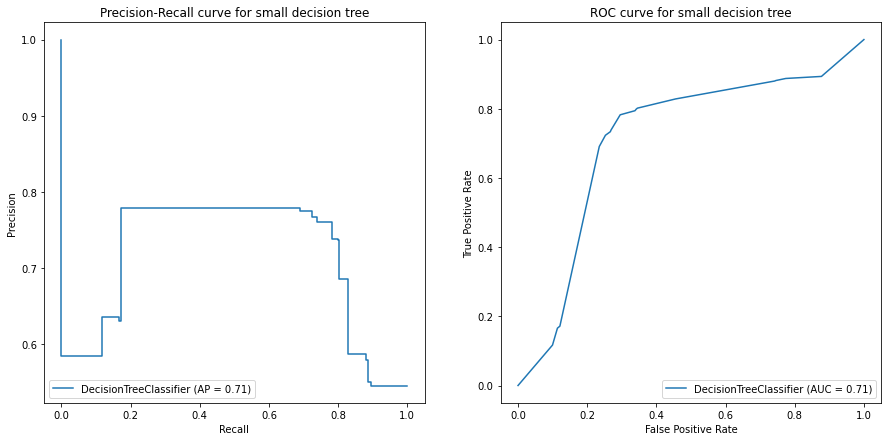

In [11]:
desc_clf(sdt, X_test, y_test, 'small decision tree')

## Deep decision tree

In [12]:
ddt = DecisionTreeClassifier(random_state=1)
ddt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

Results for test dataset:
Precision: 0.73
Recall: 0.72
Accuracy: 0.70
F1-score: 0.73
Log-loss: 10.21


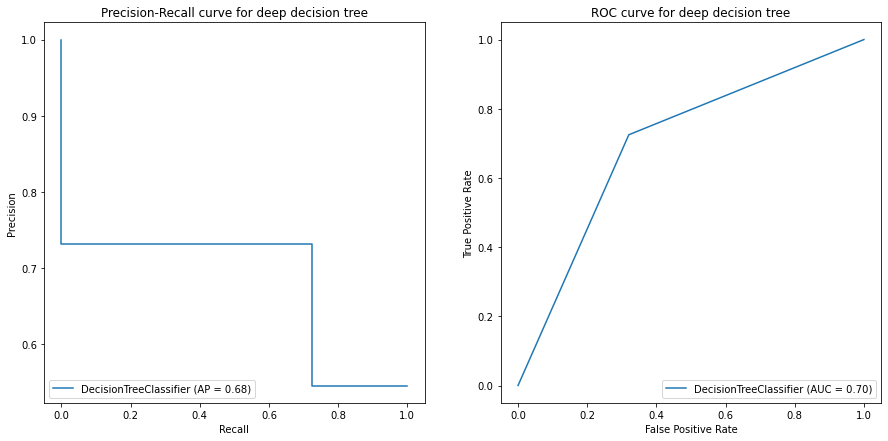

In [13]:
desc_clf(ddt, X_test, y_test, 'deep decision tree')

In [16]:
ddt.predict_proba(X_test)

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

## Discussion of the results for decision trees

How we can see, the results of small decision tree are slightly better than for deep decision tree. It happens because decision tree easily can be overfitted. Small tree is very low (only 5 layers in depth) and it can catch only the most important data dependencies. While the deep tree is perfectly fitted to the train data but for this reason it loses generalization ability and shows worse results than the small tree. In addition, each leaf in the decision tree contains only one element, thus the tree has only two kinds of probabilities (0% and 100%). Therefore, precision-recall and ROC curves consist of only 3 points for deep tree (first point: threshold for probability < 0, second point: 0 < threshold < 1; third point: threshold > 1). 

## Random forest on small trees

In [15]:
srf = RandomForestClassifier(max_depth=10, random_state=1)
srf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=1)

Results for test dataset:
Precision: 0.80
Recall: 0.81
Accuracy: 0.78
F1-score: 0.80
Log-loss: 7.45


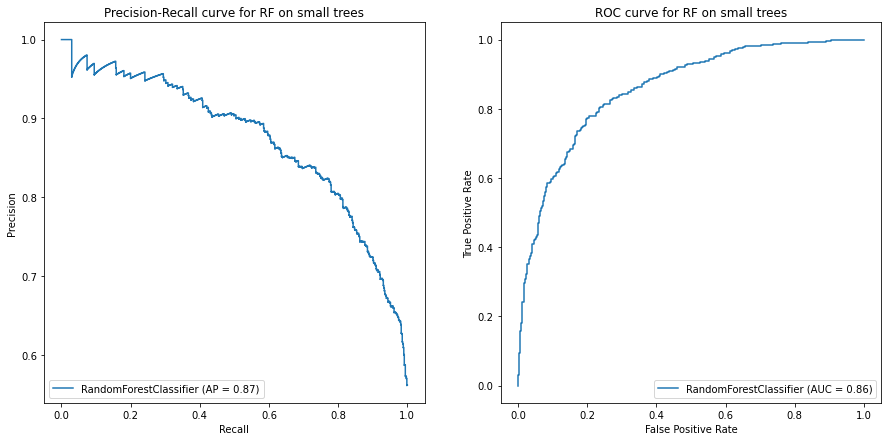

In [16]:
desc_clf(srf, X_test, y_test, 'RF on small trees')

## Random forest on deep trees

In [17]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

Results for test dataset:
Precision: 0.81
Recall: 0.81
Accuracy: 0.79
F1-score: 0.81
Log-loss: 7.14


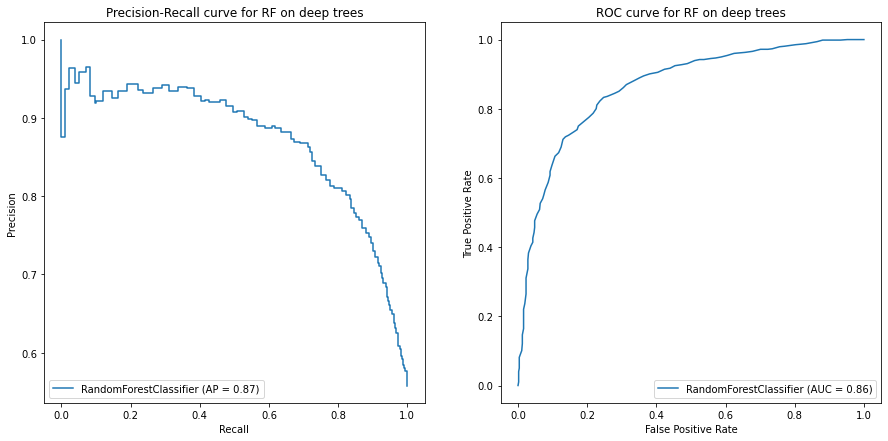

In [18]:
desc_clf(rf, X_test, y_test, 'RF on deep trees')

## Discussion of the results for random forests

100 trees were used for random forests (RF). How it can be seen, results for RF on small trees (max depth = 10) and for RF on deep trees are almost the same. In this case, using of sets of trees allows to deal with the problem of overfitting. In that case deep trees can catch some difficult dependencies and the averaging of results over all trees helps to hold generalization ability of the forest. Also, due bootstrap and limited quantity of "max_features" even ensemble of simple trees shows good results in comparison to forest on deep trees.

 ## Random forest on small trees who avoids Type II (False Negative) errors

We need to train a classifier thah avoids False Negative errors - classifier that tries to maximize the recall score. It can be done by removing of threshold for probabilities from 0.5 to 0.15. The modified Random Forest classifier is presented below:

In [23]:
class avoid_FN_RF(RandomForestClassifier):
    def predict(self, X_test, threshold=0.15):
        return np.array([1 if x[1] > threshold else 0 for x in self.predict_proba(X_test)])

In [24]:
srf = avoid_FN_RF(random_state=1)

In [25]:
srf.fit(X_train, y_train)

avoid_FN_RF(random_state=1)

Results for test dataset:
Precision: 0.59
Recall: 0.99
Accuracy: 0.62
F1-score: 0.74
Log-loss: 13.28


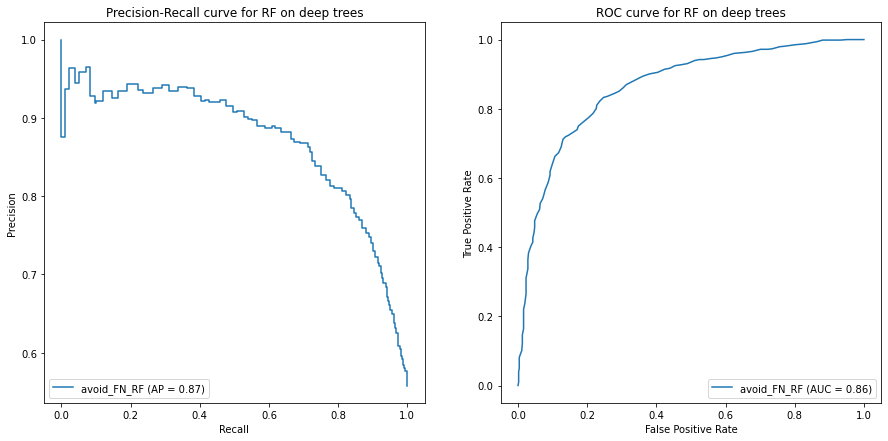

In [26]:
desc_clf(srf, X_test, y_test, 'RF on deep trees')

Moving of a threshold for probabilities allows to configure our algorithm for avoiding of the erros of different types. In our case Random Forest with threshold=0.15 achieves recall = 0.99, but precision drops from 0.81 to 0.59. Very often the treshold is selected based on practical task. 